# E10-1 Artificial Neuron Network:  Perceptron

Perceptron is the simplest element of a neural network: one neuron connected with several dendroids (input) and one or more axons (output).
Here we will create a Python model of it.

## Imports

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

## Data Preparation

In [2]:
import os
os.getcwd()

'C:\\Users\\Andreas Heick Laptop\\Documents\\VisualStudio Projects\\SOFT - 1 Semester\\Artificial Intelligence\\Week 16'

In [4]:
# load input data from diagnostic tests, first two numbers are features, the last is a label
data = np.loadtxt('data_perceptron.txt')
print(data.shape)
print(data)

(5, 3)
[[0.38 0.19 0.  ]
 [0.17 0.31 0.  ]
 [0.29 0.54 0.  ]
 [0.89 0.55 1.  ]
 [0.78 0.36 1.  ]]


In [5]:
# separate the features from the labels
X = data[:, 0:2]
print(X)

y = data[:, -1]
print(y)

[[0.38 0.19]
 [0.17 0.31]
 [0.29 0.54]
 [0.89 0.55]
 [0.78 0.36]]
[0. 0. 0. 1. 1.]


In [6]:
# reshape the labels back to a column
n = len(data)
y = y.reshape(n,1)
print(y)

[[0.]
 [0.]
 [0.]
 [1.]
 [1.]]


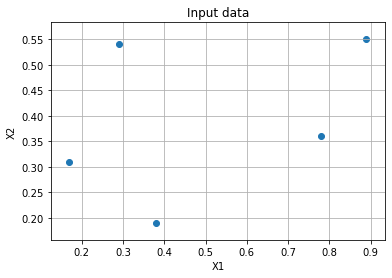

In [7]:
# plot the input data
plt.figure()
plt.title('Input data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(X[:,0], X[:,1])
plt.grid()
plt.show()

## Building Perceptron
Perceptron is the simplest type of artificial neural network.
It simulates a biological neuron, which accepts input signals via its dendrites and passes the electrical signal to the cell body.<br>
The artificial perceptron receives 'input signals' from the input training data set, which is then weighted and combined in a linear equation, used as an activation function.

## Algorithm

In [ ]:
# X values are the input, y values are the output
# We try to find such weights of X, needed for precise calculation of y

# Activation function calculates a value of firing the neuron
# activation = sum(weight_i * x_i) + bias

# Transfer function predicts the label
# if activation >= 0.0 then prediction = 1.0 else prediction = 0.0

# We reach the solution by iterations - epochs, trying to reduce the inaccuracy of the predicted output
# After the first training iteration (epoch), an error is estimated, weights adjusted, and training repeted

# Learning_rate determines how fast we advance to the solution, adjusting the weights, it is configurable
# w = w + learning_rate * (expected_output - predicted_output) * x

### Activation

In [8]:
# Define the activation function
# FX = FX + X[0]*W[0] + X[1]*W[1]
def predict(X, W, b):
    FX = b   
    for i in range(len(X)):
        FX += X[i]*W[i] 
        
        if FX >= 0.0: 
            active = 1.0 
        else: 
            active = 0.0
    return active

### Weights and Bias

In [9]:
# Assume random initial weights and a bias
import random
w1 = random.random()
w2 = random.random()
W = [w1, w2]
W

[0.045184327055105666, 0.9376719643644962]

In [10]:
bias = random.random()
bias

0.5780091091055823

In [11]:
# Define function for correcting weights using stochastic gradient descent
def train(X, y, l_rate, n_epoch):
    W = [0.0 for i in range(len(X[0]))]
    bias = -0.0 
    
    # Loop over epochs
    for epoch in range(n_epoch):
        print('Epoch=%d' %(epoch))
        sum_err = 0.0
        i=0
        # Loop over each row of the training data
        for row in X:
            print('\tRow=', row, 'W =', W, 'bias=', bias)
            
            y_predicted = predict(row, W, bias)
            # calculate the error as expected - predicted
            err = y[i] - y_predicted
            sum_err += err**2
            print("\t\tExpected=%2d, Predicted=%2d, Error=%.2f, Cumulative error=%.2f" %(y[i], y_predicted, err, sum_err))
            
            # Make corrections
            # new bias
            bias += l_rate * err        
            # Loop over each weight in a row for updating it
            n = len(row)
            for j in range(n):
                W[j] += l_rate * err * row[j]
            # End of row        
            i+=1
        # End of epoch
    return W

## Training
### Stochastic Gradient Descent, SGD

In [12]:
# The method requires two parameters
# learning rate - limits the weight correction
l_rate = 0.02
# number of iterations through the data
n_epoch = 100

In [13]:
# Implement the activation function for each data row separately
# Iterate through epochs with updated weights and bias
weights = train(X, y, l_rate, n_epoch)

Epoch=0
	Row= [0.38 0.19] W = [0.0, 0.0] bias= -0.0
		Expected= 0, Predicted= 1, Error=-1.00, Cumulative error=1.00
	Row= [0.17 0.31] W = [array([-0.0076]), array([-0.0038])] bias= [-0.02]
		Expected= 0, Predicted= 0, Error=0.00, Cumulative error=1.00
	Row= [0.29 0.54] W = [array([-0.0076]), array([-0.0038])] bias= [-0.02247]
		Expected= 0, Predicted= 0, Error=0.00, Cumulative error=1.00
	Row= [0.89 0.55] W = [array([-0.0076]), array([-0.0038])] bias= [-0.026726]
		Expected= 1, Predicted= 0, Error=1.00, Cumulative error=2.00
	Row= [0.78 0.36] W = [array([0.0102]), array([0.0072])] bias= [-0.01558]
		Expected= 1, Predicted= 0, Error=1.00, Cumulative error=3.00
Epoch=1
	Row= [0.38 0.19] W = [array([0.0258]), array([0.0144])] bias= [0.014968]
		Expected= 0, Predicted= 1, Error=-1.00, Cumulative error=1.00
	Row= [0.17 0.31] W = [array([0.0182]), array([0.0106])] bias= [0.007508]
		Expected= 0, Predicted= 1, Error=-1.00, Cumulative error=2.00
	Row= [0.29 0.54] W = [array([0.0148]), array([0

	Row= [0.38 0.19] W = [array([0.0776]), array([-0.0874])] bias= [0.041578]
		Expected= 0, Predicted= 1, Error=-1.00, Cumulative error=1.00
	Row= [0.17 0.31] W = [array([0.07]), array([-0.0912])] bias= [0.03446]
		Expected= 0, Predicted= 1, Error=-1.00, Cumulative error=2.00
	Row= [0.29 0.54] W = [array([0.0666]), array([-0.0974])] bias= [-0.001912]
		Expected= 0, Predicted= 0, Error=0.00, Cumulative error=2.00
	Row= [0.89 0.55] W = [array([0.0666]), array([-0.0974])] bias= [-0.035194]
		Expected= 1, Predicted= 0, Error=1.00, Cumulative error=3.00
	Row= [0.78 0.36] W = [array([0.0844]), array([-0.0864])] bias= [-0.00949]
		Expected= 1, Predicted= 1, Error=0.00, Cumulative error=3.00
Epoch=36
	Row= [0.38 0.19] W = [array([0.0844]), array([-0.0864])] bias= [0.025238]
		Expected= 0, Predicted= 1, Error=-1.00, Cumulative error=1.00
	Row= [0.17 0.31] W = [array([0.0768]), array([-0.0902])] bias= [0.020894]
		Expected= 0, Predicted= 1, Error=-1.00, Cumulative error=2.00
	Row= [0.29 0.54] W = 

	Row= [0.89 0.55] W = [array([0.1078]), array([-0.1432])] bias= [-0.022142]
		Expected= 1, Predicted= 0, Error=1.00, Cumulative error=3.00
	Row= [0.78 0.36] W = [array([0.1256]), array([-0.1322])] bias= [0.01504]
		Expected= 1, Predicted= 1, Error=0.00, Cumulative error=3.00
Epoch=56
	Row= [0.38 0.19] W = [array([0.1256]), array([-0.1322])] bias= [0.065416]
		Expected= 0, Predicted= 1, Error=-1.00, Cumulative error=1.00
	Row= [0.17 0.31] W = [array([0.118]), array([-0.136])] bias= [0.068026]
		Expected= 0, Predicted= 1, Error=-1.00, Cumulative error=2.00
	Row= [0.29 0.54] W = [array([0.1146]), array([-0.1422])] bias= [0.025926]
		Expected= 0, Predicted= 0, Error=0.00, Cumulative error=2.00
	Row= [0.89 0.55] W = [array([0.1146]), array([-0.1422])] bias= [-0.017628]
		Expected= 1, Predicted= 1, Error=0.00, Cumulative error=2.00
	Row= [0.78 0.36] W = [array([0.1146]), array([-0.1422])] bias= [0.006156]
		Expected= 1, Predicted= 1, Error=0.00, Cumulative error=2.00
Epoch=57
	Row= [0.38 0.1

	Row= [0.29 0.54] W = [array([0.1546]), array([-0.2054])] bias= [0.031786]
		Expected= 0, Predicted= 0, Error=0.00, Cumulative error=2.00
	Row= [0.89 0.55] W = [array([0.1546]), array([-0.2054])] bias= [-0.034296]
		Expected= 1, Predicted= 0, Error=1.00, Cumulative error=3.00
	Row= [0.78 0.36] W = [array([0.1724]), array([-0.1944])] bias= [0.010328]
		Expected= 1, Predicted= 1, Error=0.00, Cumulative error=3.00
Epoch=84
	Row= [0.38 0.19] W = [array([0.1724]), array([-0.1944])] bias= [0.074816]
		Expected= 0, Predicted= 1, Error=-1.00, Cumulative error=1.00
	Row= [0.17 0.31] W = [array([0.1648]), array([-0.1982])] bias= [0.083392]
		Expected= 0, Predicted= 1, Error=-1.00, Cumulative error=2.00
	Row= [0.29 0.54] W = [array([0.1614]), array([-0.2044])] bias= [0.029966]
		Expected= 0, Predicted= 0, Error=0.00, Cumulative error=2.00
	Row= [0.89 0.55] W = [array([0.1614]), array([-0.2044])] bias= [-0.033604]
		Expected= 1, Predicted= 0, Error=1.00, Cumulative error=3.00
	Row= [0.78 0.36] W =

In [14]:
# Test
k = 0.78*0.023 + 0.36*0.0178 - 0.02
k

0.004348000000000001

In [15]:
k = 0.38*0.023 + 0.19*0.017 -0.02
k

-0.00803

## Using Library Function

In [18]:
# !pip install neurolab
import neurolab as nl
# Dimensions of the inputs
d1min, d1max, d2min, d2max = 0, 1, 0, 1
inp1 = [d1min, d1max]
inp2 = [d2min, d2max]
inp = [inp1, inp2]

# One output neuron, producing binary result
outp = y.shape[1]

In [23]:
perceptron = nl.net.newp(inp, outp)
print(perceptron)

### Train Model

In [24]:
# Measure the error of classification at each itteration
err = perceptron.train(X, y, epochs=100, show=20, lr=0.03)
print(err)

The goal of learning is reached
[1.0, 1.5, 1.5, 1.5, 0.0]


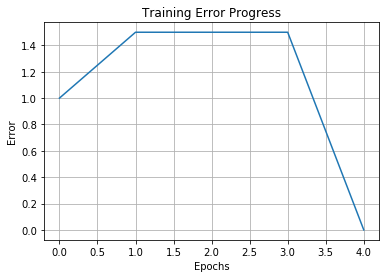

In [25]:
# Plot the error
plt.figure()
plt.title('Training Error Progress')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(err)
plt.grid()
plt.show()

In [26]:
### Run the classifier on test datapoints
print('\nTest results:')
data_test = [[0.38, 0.19], [0.4, 0.6], [0.7, 0.1]]
for item in data_test:
    print(item, '-->', perceptron.sim([item])[0])


Test results:
[0.38, 0.19] --> [0.]
[0.4, 0.6] --> [1.]
[0.7, 0.1] --> [1.]


## Test With Other Data

In [ ]:
# 